## Get a corpus of articles

In [6]:
import urllib3 as ul3
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import certifi
http = ul3.PoolManager(cert_reqs='CERT_REQUIRED',ca_certs=certifi.where())

In [7]:
url = 'https://developer.paciellogroup.com/blog/'

def get_url(url):
    req = http.request('GET',url)
    page = req.data.decode('utf-8','ignore')
    soup = bs(page,'lxml')
    return soup

soup = get_url(url)
soup

<!DOCTYPE html>
<!--[if IE 7]>
<html class="ie ie7" lang="en-US">
<![endif]--><!--[if IE 8]>
<html class="ie ie8" lang="en-US">
<![endif]--><!--[if !(IE 7) | !(IE 8) ]><!--><html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<title>Blog | TPG – Digital Accessibility Solutions</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, shrink-to-fit=no" name="viewport"/>
<link href="https://developer.paciellogroup.com/feed/" rel="alternate" title="TPG" type="application/rss+xml"/>
<link href="https://developer.paciellogroup.com/feed/atom/" rel="alternate" title="TPG" type="application/atom+xml"/>
<meta content="#1b75bc" name="theme-color"/>
<link href="https://developer.paciellogroup.com/wp-content/themes/tpg2015/images/icon192x192.png" rel="icon" sizes="192x192"/>
<link href="https://developer.paciellogroup.com/wp-content/themes/tpg2015/images/icon192x192.png" rel="apple-touch-icon"/>
<meta content="The Paciello Group (TPG)" name="a

In [8]:
soup.h2.a['href']

'https://developer.paciellogroup.com/blog/2018/09/describing-aria-describedby/'

In [9]:
links = []
def fetch_links(url):
    req = http.request('GET',url)
    page = req.data.decode('utf-8','ignore')
    soup = bs(page,'lxml')
    all_h2 = soup.findAll('h2')
    for h in all_h2:
        try:
            a = h.a['href']
            links.append(a)
        except:
            a = ""
    for c in soup.findAll('span'):
        try:
            n = c['class']
            if n == ['next']:
                fetch_links(c.a['href'])
        except:
            n = ""
    return set(links)

In [10]:
links = fetch_links('https://developer.paciellogroup.com/blog/')

In [11]:
links = [l for l in links]
links

['https://developer.paciellogroup.com/blog/2015/06/the-viking-and-the-lumberjack-accessibility-in-the-real-world/',
 'https://developer.paciellogroup.com/blog/2012/04/web-accessibility-toolbar-2012/',
 'https://developer.paciellogroup.com/blog/2008/09/free-aria/',
 'https://developer.paciellogroup.com/blog/2015/02/emulating-failure/',
 'https://developer.paciellogroup.com/blog/2014/02/doesnt-work-lynx/',
 'https://developer.paciellogroup.com/blog/2012/10/notes-on-accessibility-of-microsoft-coms-new-home-page/',
 'https://developer.paciellogroup.com/blog/2015/10/accessibility-testing-with-android-talkback/',
 'https://developer.paciellogroup.com/blog/2017/01/section-508-refresh-part-1/',
 'https://developer.paciellogroup.com/blog/2011/11/html5-accessibility-chops-using-nested-figure-elements/',
 'https://developer.paciellogroup.com/blog/2011/06/html5-accessibility-chops-aria-validation/',
 'https://developer.paciellogroup.com/blog/2015/04/aviewer-accessibility-inspection-tool-on-github/

In [14]:
markup = get_url(links[3])

In [15]:
markup.article.text
    

'\nEmulating failure\n\nPosted on Monday, 2 February 2015 by Steve Faulkner\n\nCategory: Strategy \n\nHTML has a problem. As implemented in browsers many interactive elements cannot be styled as desired by web developers, or developers as directed by designers, marketing or any of the numerous others whose wishes code cutters must abide by.\n\nSomething borrowed, something blue\nTake for example, Google’s gmail UI, a ‘web application’ if there ever was one. It consists of literally 100’s of controls, many of which are simple controls such as buttons and checkboxes.\n\nLooking under the hood, what is evident is there are a lot of custom controls built from <div>‘s and <span>‘s:\nHTML: 1, HEAD: 1, STYLE: 8, META: 6, TITLE: 1, LINK: 3, SCRIPT: 11, BODY: 1,\xa0 IFRAME: 11,\xa0 DIV: 3757, FORM: 3,\xa0 INPUT: 11,\xa0 NOSCRIPT: 1,\xa0 P: 1,\xa0 A: 107,\xa0 B: 433, OL: 1, LI: 19, BR: 115, UL: 2, SPAN: 1603,\xa0 IMG: 263,\xa0 H2: 6,\xa0 FIELDSET: 2,\xa0 LEGEND: 2,\xa0 TABLE: 10, TBODY: 61, TR: 

In [16]:
def get_article_text(article_url):
        req = http.request('GET',article_url)
        page = req.data.decode('utf-8','ignore')
        soup = bs(page,'lxml')
        article = soup.article.text.replace('\n',' ')
        article = article.replace('\xa0',' ')
        return article

In [19]:
a = get_article_text(links[6])

In [20]:
a

' Accessibility testing with Android Talkback  Posted on Tuesday, 6 October 2015 by Henny Swan  Category: Testing Tag: AndroidTag: TalkBack   Android has a number of accessibility features that are directly affected by how you design and build your website or application. These include:  Talkback – a screen reader that uses spoken feedback to describe your actions and to tell you about alerts and notifications on screen Switch Access – enables you to control your device with one or more switches. Useful for people with limited mobility, switch access provides an alternative to using the touch screen Large text – allows you to choose your preferred font size by increasing and decreasing the text size on your device  In this post I’ll look at how to use and optimize Talkback for accessibility testing. All testing for the post was done using Nexus 9, version 5.1.1 and should be valid for KitKat (4.4.x) and Lollipop (5.x). Optimizing Talkback Before you start using Talkback there are a few

In [21]:
def get_corpus(ls):
    corp = []
    for a in ls:
         corp.append(get_article_text(a))
    return corp

In [22]:
corpus = get_corpus(links)

In [23]:
corpus_string = " ".join(corpus)

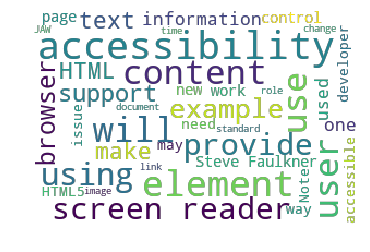

In [24]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=300, height=200,min_font_size=8, mode='RGBA', background_color=None).generate(corpus_string)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Word Vecotrs with Word2Vec
[What can you do with word vectors](https://radimrehurek.com/gensim/models/keyedvectors.html)

In [25]:
import gensim
prep_corpus = gensim.utils.simple_preprocess(corpus_string)

In [26]:
print(prep_corpus)

['the', 'viking', 'and', 'the', 'lumberjack', 'accessibility', 'in', 'the', 'real', 'world', 'posted', 'on', 'wednesday', 'june', 'by', 'billy', 'gregory', 'category', 'news', 'think', 'accessibility', 'is', 'just', 'for', 'people', 'with', 'disabilities', 'the', 'viking', 'and', 'the', 'lumberjack', 'disagree', 'join', 'karl', 'the', 'viking', 'groves', 'and', 'billy', 'the', 'lumberjack', 'gregory', 'as', 'they', 'take', 'humorous', 'look', 'at', 'how', 'we', 'all', 'use', 'accessibility', 'features', 'in', 'our', 'every', 'day', 'lives', 'with', 'audio', 'description', 'web', 'accessibility', 'toolbar', 'posted', 'on', 'friday', 'april', 'by', 'steve', 'faulkner', 'category', 'testing', 'tag', 'wat', 'the', 'web', 'accessibility', 'toolbar', 'has', 'been', 'updated', 'with', 'new', 'features', 'thanks', 'to', 'jun', 'for', 'all', 'his', 'work', 'check', 'current', 'page', 'using', 'the', 'nu', 'markup', 'validation', 'service', 'can', 'check', 'local', 'behind', 'firewall', 'pages',

In [27]:
test=[prep_corpus]

In [28]:
from gensim.models import Word2Vec
model = Word2Vec(test, size=150, min_count=2,window=10)

model.train(test,total_examples=1,epochs=5)

(50000, 1038275)

In [31]:
w1=['html']
model.wv.most_similar(positive=w1)

/Users/derekjackson/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('on', 0.9999811053276062),
 ('accessibility', 0.9999786615371704),
 ('in', 0.999978244304657),
 ('by', 0.9999769926071167),
 ('work', 0.9999754428863525),
 ('has', 0.9999753832817078),
 ('at', 0.9999744892120361),
 ('and', 0.9999744892120361),
 ('from', 0.999974250793457),
 ('or', 0.9999731779098511)]

In [35]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk



from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Users/derekjackson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


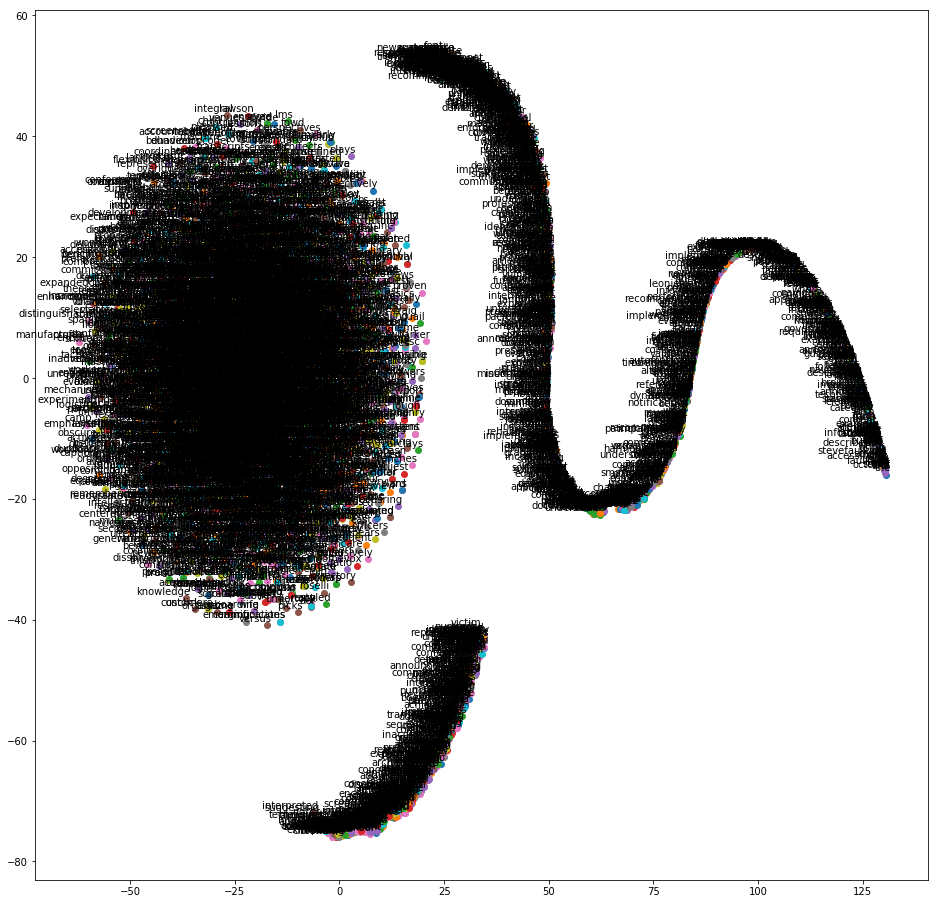

In [37]:
tsne_plot(model)